<a href="https://colab.research.google.com/github/dharanidharatdd/FMML_Projects_and_Labs/blob/main/Dharanidhara's_FMML_2022_Module_04_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Module: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

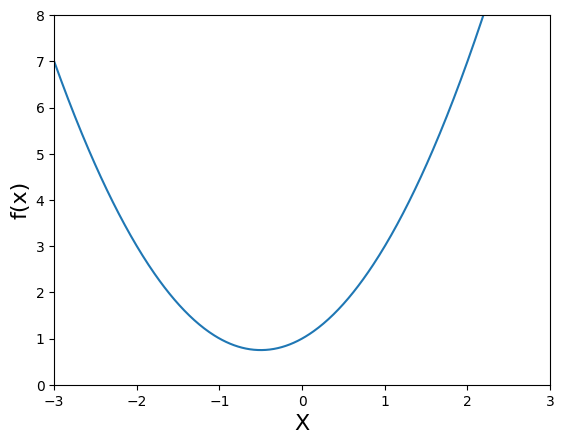

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

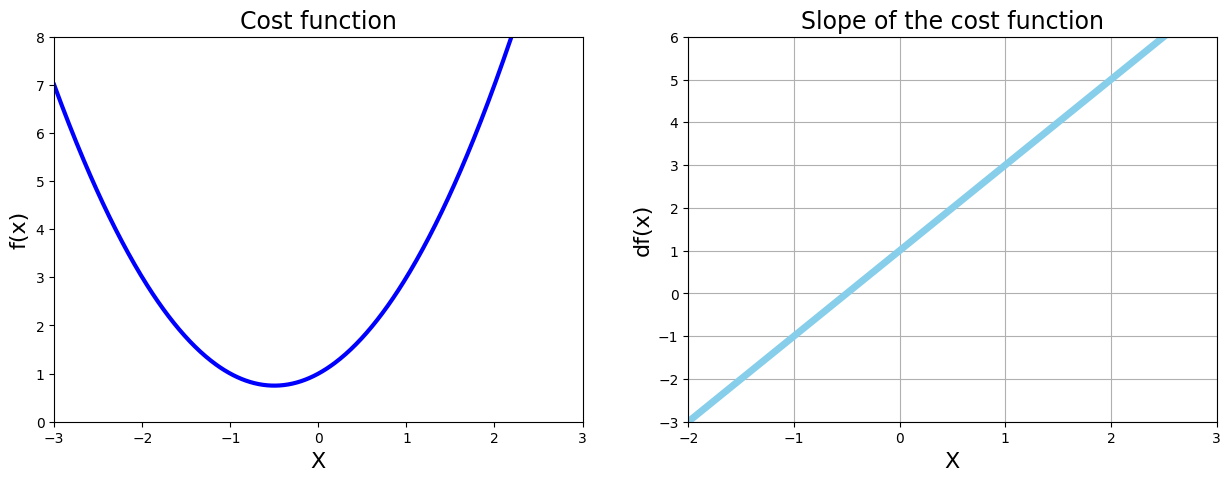

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [8]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)## [REQUIRED]
    new_x =  previous_x - step_multiplier * gradient## [REQUIRED]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x)) ## [REQUIRED])

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


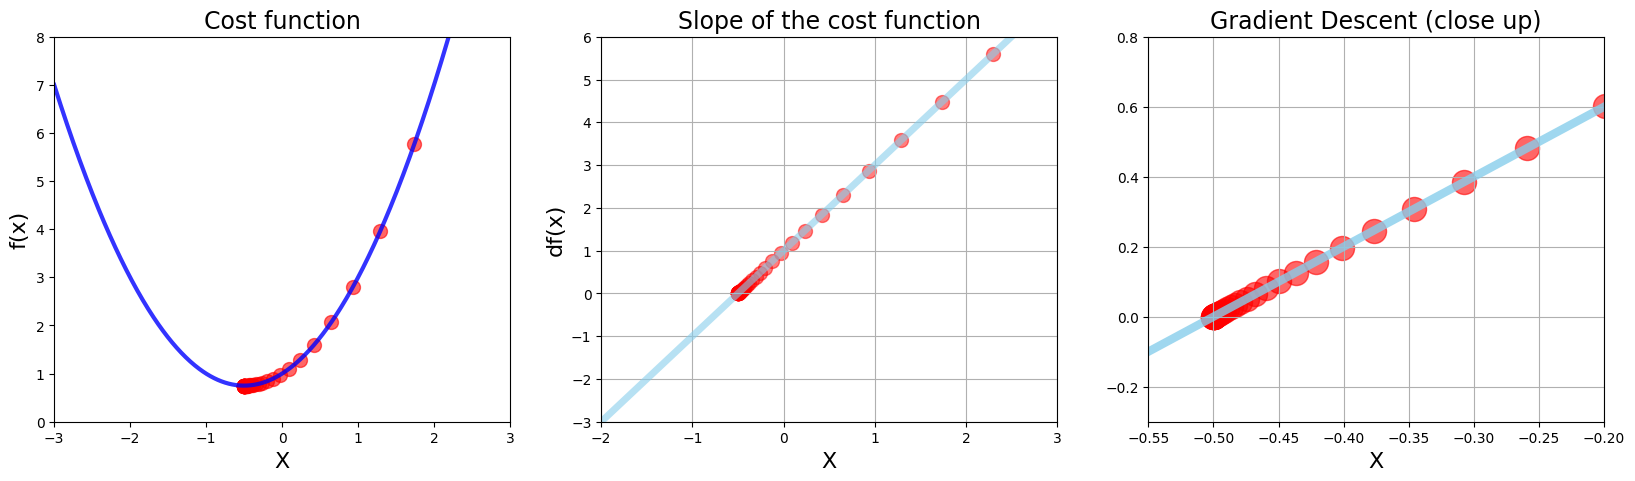

In [9]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return np.sin(x) ## [REQUIRED]

def dg(x):
    return np.cos(x)## [REQUIRED]

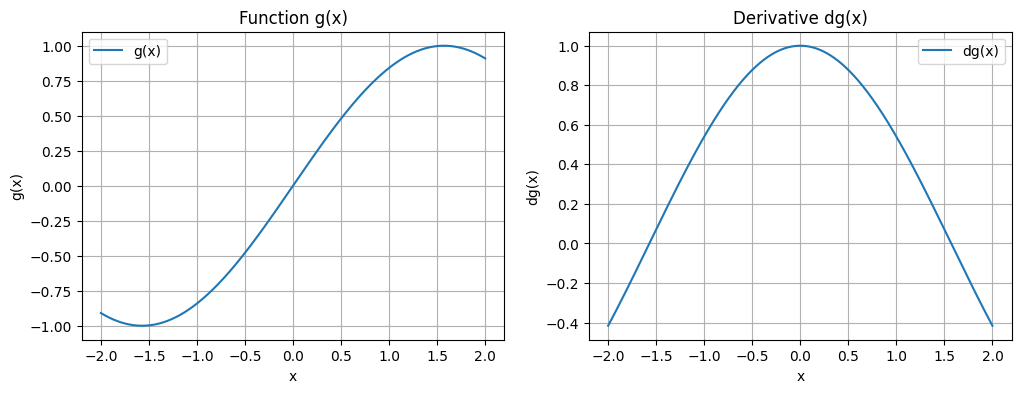

In [11]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
import matplotlib.pyplot as plt

# Plotting the function g(x)
plt.figure(figsize=(12, 4))

# Plotting g(x)
plt.subplot(1, 2, 1)
plt.title('Function g(x)')
plt.plot(x_2, g(x_2), label='g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plotting the derivative dg(x)
plt.subplot(1, 2, 2)
plt.title('Derivative dg(x)')
plt.plot(x_2, dg(x_2), label='dg(x)')
plt.xlabel('x')
plt.ylabel('dg(x)')
plt.grid(True)
plt.legend()

plt.show()

## Gradient Descent

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.522668191761128
Number of steps: 212


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.5125430525706185
Number of steps: 301


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.521868468292447
Number of steps: 180


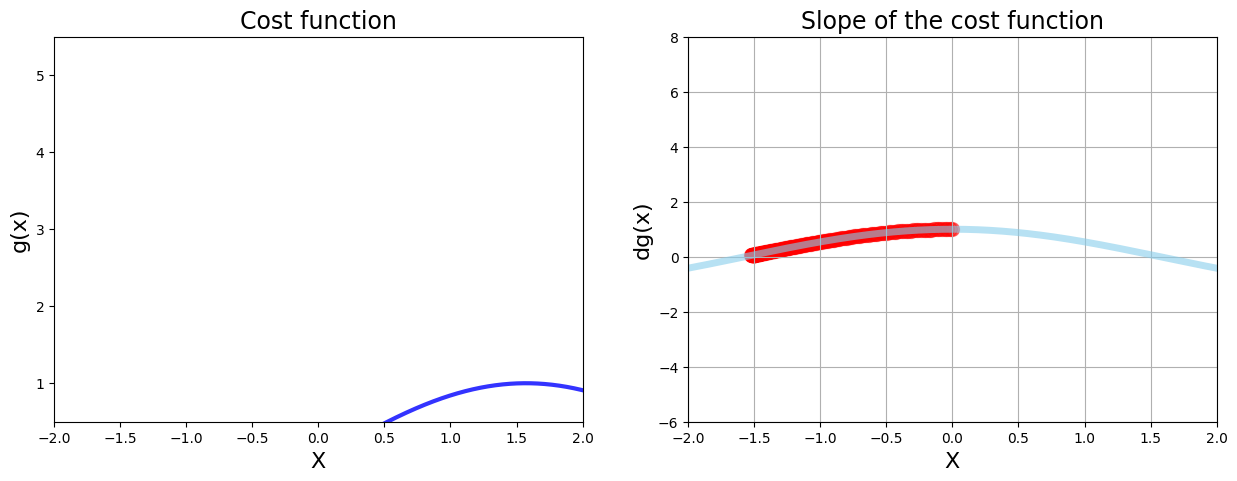

In [16]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

Loop ran this many times: 63
Local minimum occurs at: -1.5707128158217363
Slope or dg(x) value at this point is: 8.351097306327593e-05
g(x) value at this point is: -0.9999999965129587


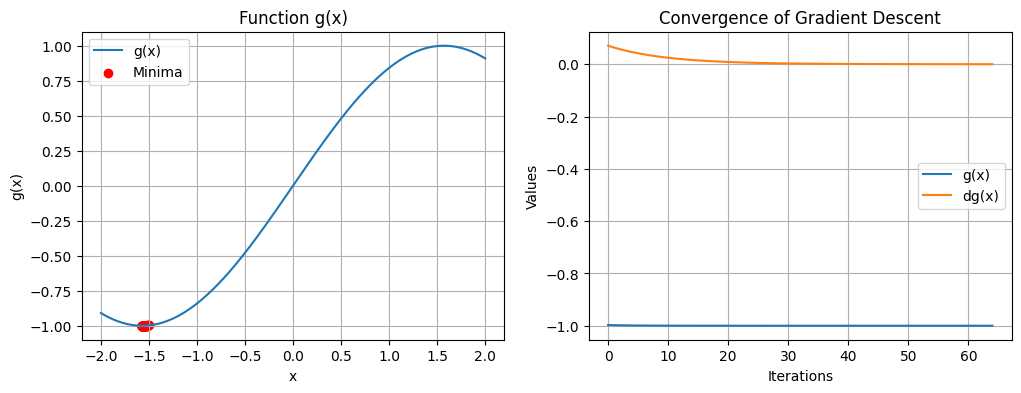

In [17]:
## TASK-4 : Code the same things as they were done for the first two examples
new_x_2 = -1.5
previous_x_2 = 0
step_multiplier_2 = 0.1
precision_2 = 0.00001

x_list_2 = [new_x_2]
slope_list_2 = [dg(new_x_2)]

for n in range(500):
    previous_x_2 = new_x_2
    gradient_2 = dg(previous_x_2)  # [REQUIRED] Calculate the gradient (dg/dx) at the current point
    new_x_2 = previous_x_2 - step_multiplier_2 * gradient_2  # [REQUIRED] Update the current point using gradient descent

    step_size_2 = abs(new_x_2 - previous_x_2)

    x_list_2.append(new_x_2)
    slope_list_2.append(dg(new_x_2))  # [REQUIRED] Calculate the slope at the updated point

    if step_size_2 < precision_2:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x_2)
print('Slope or dg(x) value at this point is:', dg(new_x_2))
print('g(x) value at this point is:', g(new_x_2))


# Plotting the convergence
plt.figure(figsize=(12, 4))

# Plotting the function g(x)
plt.subplot(1, 2, 1)
plt.title('Function g(x)')
plt.plot(x_2, g(x_2), label='g(x)')
plt.scatter(x_list_2, g(np.array(x_list_2)), color='red', label='Minima')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plotting the convergence of gradient descent
plt.subplot(1, 2, 2)
plt.title('Convergence of Gradient Descent')
plt.plot(range(len(x_list_2)), g(np.array(x_list_2)), label='g(x)')
plt.plot(range(len(x_list_2)), slope_list_2, label='dg(x)')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.grid(True)
plt.legend()

plt.show()

# The Learning Rate

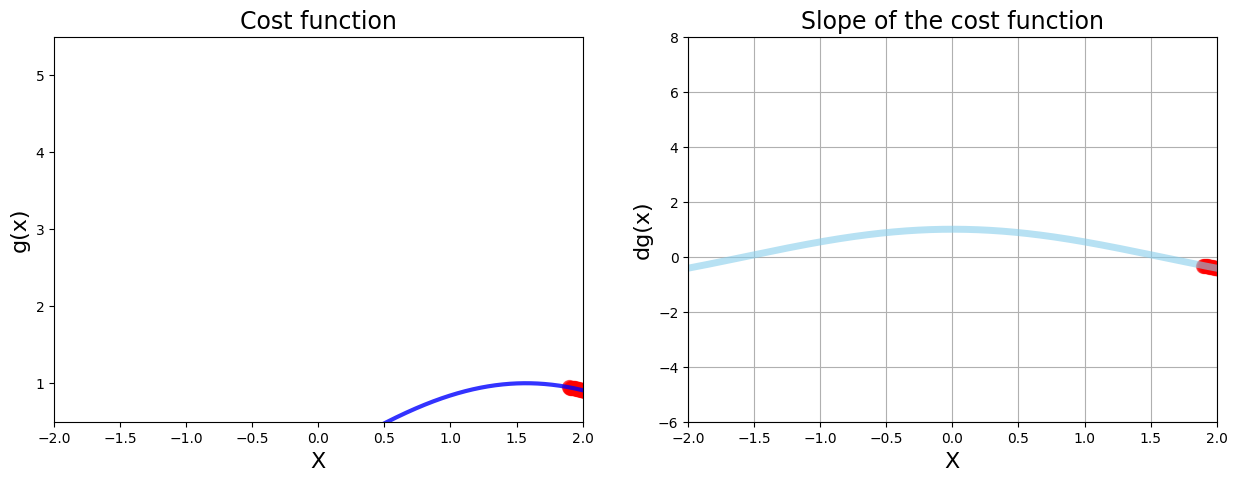

Number of steps is:  276


In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

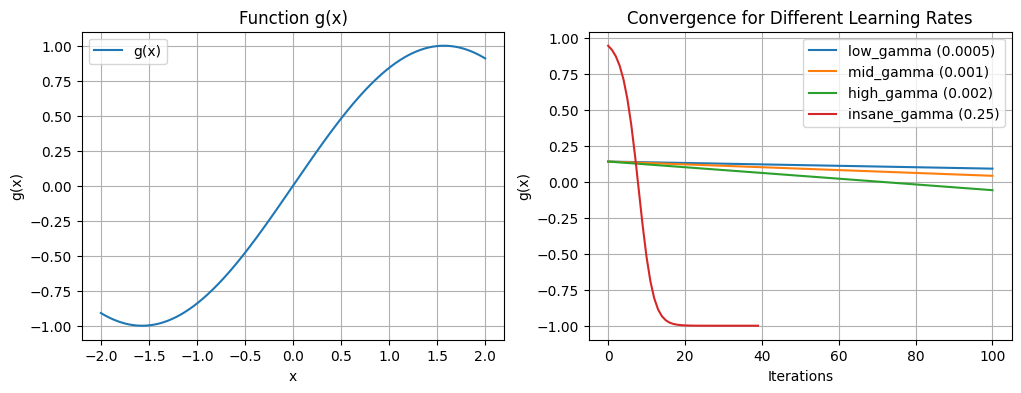

In [20]:
##########################
##########################

## TASK-5 : Run gradient descent 3 times

##########################
##########################

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

##########################
##########################

##########################
##########################

## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)

##########################
##########################

# Plotting the convergence for different learning rates
plt.figure(figsize=(12, 4))

# Plotting the function g(x)
plt.subplot(1, 2, 1)
plt.title('Function g(x)')
plt.plot(x_2, g(x_2), label='g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plotting the convergence for different learning rates
plt.subplot(1, 2, 2)
plt.title('Convergence for Different Learning Rates')
plt.plot(range(len(low_gamma[1])), g(np.array(low_gamma[1])), label='low_gamma (0.0005)')
plt.plot(range(len(mid_gamma[1])), g(np.array(mid_gamma[1])), label='mid_gamma (0.001)')
plt.plot(range(len(high_gamma[1])), g(np.array(high_gamma[1])), label='high_gamma (0.002)')
plt.plot(range(len(insane_gamma[1])), g(np.array(insane_gamma[1])), label='insane_gamma (0.25)')
plt.xlabel('Iterations')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

plt.show()


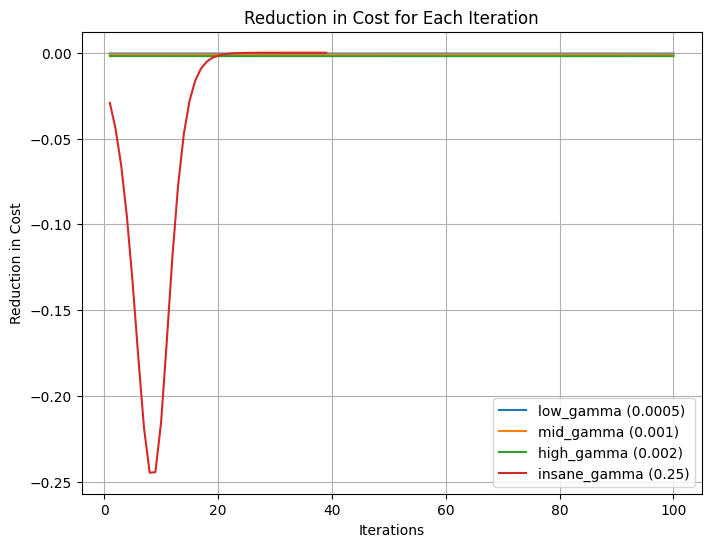

In [21]:
##########################
##########################

## TASK-7 : Plot reduction in cost for each iteration

##########################
##########################

# Plotting the reduction in cost for each iteration
plt.figure(figsize=(8, 6))
plt.title('Reduction in Cost for Each Iteration')
plt.plot(range(1, len(low_gamma[1])), np.diff(g(np.array(low_gamma[1]))), label='low_gamma (0.0005)')
plt.plot(range(1, len(mid_gamma[1])), np.diff(g(np.array(mid_gamma[1]))), label='mid_gamma (0.001)')
plt.plot(range(1, len(high_gamma[1])), np.diff(g(np.array(high_gamma[1]))), label='high_gamma (0.002)')
plt.plot(range(1, len(insane_gamma[1])), np.diff(g(np.array(insane_gamma[1]))), label='insane_gamma (0.25)')
plt.xlabel('Iterations')
plt.ylabel('Reduction in Cost')
plt.grid(True)
plt.legend()
plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

Loop ran this many times: 63
Local minimum occurs at: -1.5707128158217363
Slope or dg(x) value at this point is: 8.351097306327593e-05
g(x) value at this point is: -0.9999999965129587


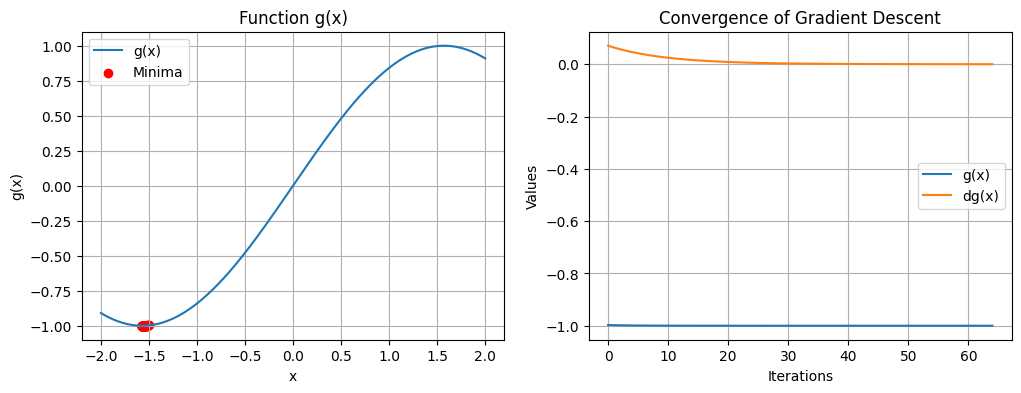

In [22]:
##########################
##########################

## TASK-8 : Code the same things as they were done for the first two examples

##########################
##########################

# Gradient Descent
new_x_3 = -1.5
previous_x_3 = 0
step_multiplier_3 = 0.1
precision_3 = 0.00001

x_list_3 = [new_x_3]
slope_list_3 = [dg(new_x_3)]

for n in range(500):
    previous_x_3 = new_x_3
    gradient_3 = dg(previous_x_3)  # [REQUIRED] Calculate the gradient (dg/dx) at the current point
    new_x_3 = previous_x_3 - step_multiplier_3 * gradient_3  # [REQUIRED] Update the current point using gradient descent

    step_size_3 = abs(new_x_3 - previous_x_3)

    x_list_3.append(new_x_3)
    slope_list_3.append(dg(new_x_3))  # [REQUIRED] Calculate the slope at the updated point

    if step_size_3 < precision_3:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x_3)
print('Slope or dg(x) value at this point is:', dg(new_x_3))
print('g(x) value at this point is:', g(new_x_3))


# Plotting the convergence
plt.figure(figsize=(12, 4))

# Plotting the function g(x)
plt.subplot(1, 2, 1)
plt.title('Function g(x)')
plt.plot(x_2, g(x_2), label='g(x)')
plt.scatter(x_list_3, g(np.array(x_list_3)), color='red', label='Minima')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plotting the convergence of gradient descent
plt.subplot(1, 2, 2)
plt.title('Convergence of Gradient Descent')
plt.plot(range(len(x_list_3)), g(np.array(x_list_3)), label='g(x)')
plt.plot(range(len(x_list_3)), slope_list_3, label='dg(x)')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.grid(True)
plt.legend()

plt.show()


In [23]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


TypeError: ignored

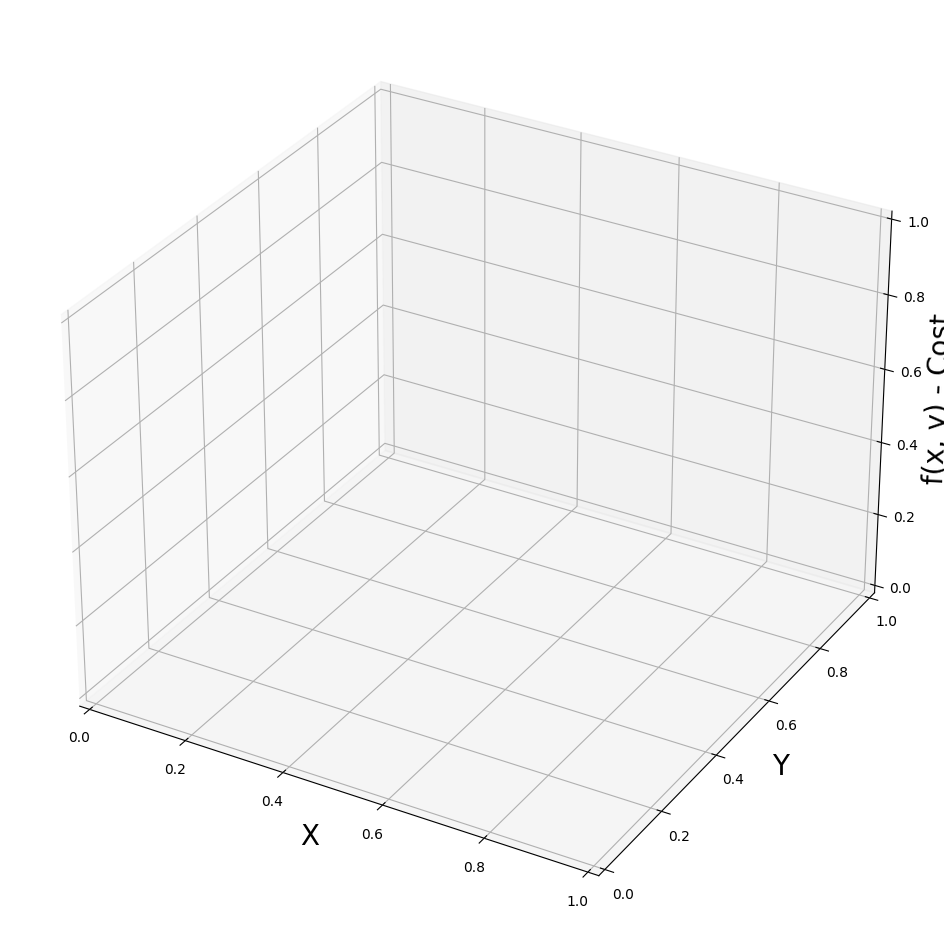

In [24]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \cos(x) + y^2$$ ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = 2xy - e^{-y}$$ ## [REQUIRED]

In [27]:
from sympy import symbols, diff, cos, exp

a, b = symbols('x y')
f = cos(a) + a * b**2 - exp(-b)

print('Our cost function f(x, y) is: ', f)
print('Partial derivative wrt x is: ', diff(f, a))
print('Value of f(x, y) at x=1.8, y=1.0 is: ',
      f.evalf(subs={a: 1.8, b: 1.0}))  # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f, a).evalf(subs={a: 1.8, b: 1.0}))


Our cost function f(x, y) is:  x*y**2 + cos(x) - exp(-y)
Partial derivative wrt x is:  y**2 - sin(x)
Value of f(x, y) at x=1.8, y=1.0 is:  1.20491846413547
Value of partial derivative wrt x:  0.0261523691218048


## Batch Gradient Descent with SymPy

In [29]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess
a, b = symbols('x y')  # define symbols

for n in range(max_iter):
    gradient_x = diff(f, a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f, b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f.evalf(subs={a: params[0], b: params[1]}))


Values in gradient array [-1.88543048688250e-15 -2.94604221814282e-17]
Minimum occurs at x value of:  3.10316027343332
Minimum occurs at y value of:  -0.196017651699510
The cost is:  -2.09657746802367


In [2]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return cos(x) - y * exp(-y)  # [REQUIRED]

def fpy(x, y):
    return -x**2 * exp(y)  # [REQUIRED]


In [7]:
import numpy as np
from sympy import symbols, cos, exp

# Define the cost function for numerical evaluation
def f(x, y):
    return np.cos(x) + x * y**2 - np.exp(-y)

# Partial derivative functions example 4
a, b = symbols('x y')

def fpx(x, y):
    return np.cos(x) - y * np.exp(-y)

def fpy(x, y):
    return -x**2 * np.exp(y)

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess
precision = 0.00001  # convergence criterion

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

    # Convergence check
    step_size = np.linalg.norm(multiplier * gradients)
    if step_size < precision:
        print('Converged at iteration:', n)
        break

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [nan nan]
Minimum occurs at x value of:  nan
Minimum occurs at y value of:  nan
The cost is:  nan


<ipython-input-7-2f366efe3476>:15: RuntimeWarning: overflow encountered in exp
  return -x**2 * np.exp(y)
<ipython-input-7-2f366efe3476>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.cos(x) - y * np.exp(-y)


## Graphing 3D Gradient Descent

In [8]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [nan nan]
Minimum occurs at x value of:  nan
Minimum occurs at y value of:  nan
The cost is:  nan


<ipython-input-7-2f366efe3476>:15: RuntimeWarning: overflow encountered in exp
  return -x**2 * np.exp(y)
<ipython-input-7-2f366efe3476>:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.cos(x) - y * np.exp(-y)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()


## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [11]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [14]:
from sklearn.linear_model import LinearRegression

# Quick linear regression
regr = LinearRegression()

# Fit the model
regr.fit(x_5, y_5)

# Print the coefficients (Theta 0 and Theta 1)
print('Theta 0 (intercept):', regr.intercept_[0])
print('Theta 1 (slope):', regr.coef_[0][0])


Theta 0 (intercept): 0.8475351486029545
Theta 1 (slope): 1.2227264637835913


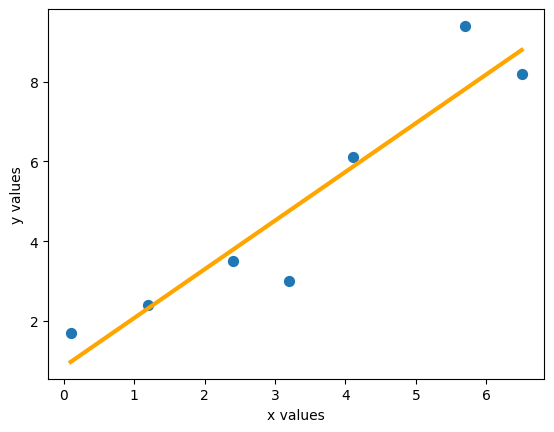

In [15]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [16]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [17]:
def mse(y, y_hat):
    mse_calc = 1/7 * sum((y - y_hat)**2)
    return mse_calc

# Assuming y_true and y_pred are your target variable and predicted values, respectively
y_true = np.array([32, 45, 23, 67, 12, 54, 31])
y_pred = np.array([30, 40, 20, 60, 10, 50, 30])

# Call the mse function
mse_value = mse(y_true, y_pred)

# Print out the MSE
print('Mean Squared Error (MSE):', mse_value)


Mean Squared Error (MSE): 15.428571428571427


In [19]:
from sklearn.metrics import mean_squared_error

# Assuming y_5 and y_hat are your true values and predicted values, respectively
y_5 = np.array([32, 45, 23, 67, 12, 54, 31])
y_hat = np.array([30, 40, 20, 60, 10, 50, 30])

# Manually calculated MSE
manual_mse = mse(y_5, y_hat)
print('Manually calculated MSE is:', manual_mse)

# MSE using scikit-learn's mean_squared_error for manual predictions
mse_regression_manual = mean_squared_error(y_5, y_hat)
print('MSE regression using manual calc is', mse_regression_manual)

# MSE using scikit-learn's mean_squared_error for linear regression predictions
mse_regression_model = mean_squared_error(y_5, regr.predict(x_5))
print('MSE regression is', mse_regression_model)


Manually calculated MSE is: 15.428571428571427
MSE regression using manual calc is 15.428571428571429
MSE regression is 1384.5166008186509


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [20]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [24]:
def mse(y, y_hat):
    mse_calc = np.average((y - y_hat)**2)
    return float(mse_calc)


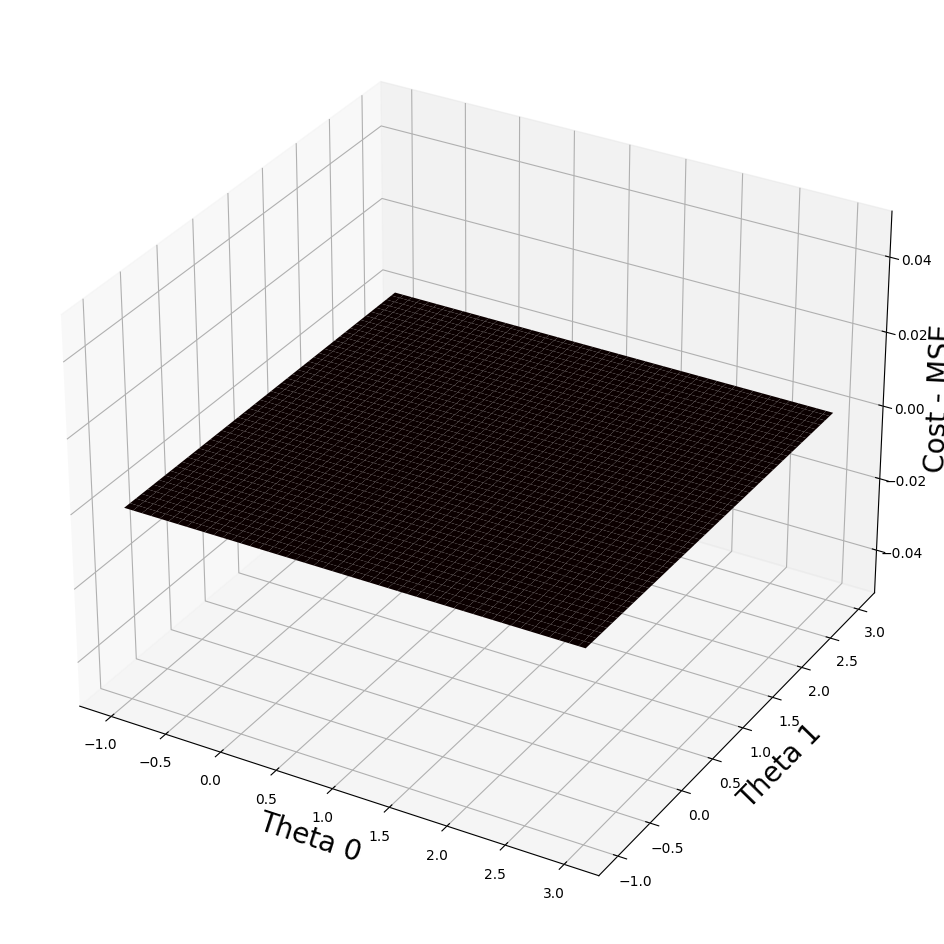

In [25]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [26]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.0
Min occurs at (i,j): (0, 0)
Min MSE for Theta 0 at plot_t0[111][91] -1.0
Min MSE for Theta 1 at plot_t1[111][91] -1.0


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [27]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [30]:
def grad(x, y, thetas):
    n = len(y)
    y_hat = thetas[0] + thetas[1]*x
    error = y_hat - y

    # Compute gradients
    gradient_0 = 2 * np.sum(error) / n
    gradient_1 = 2 * np.sum(error * x) / n

    return np.array([gradient_0, gradient_1])


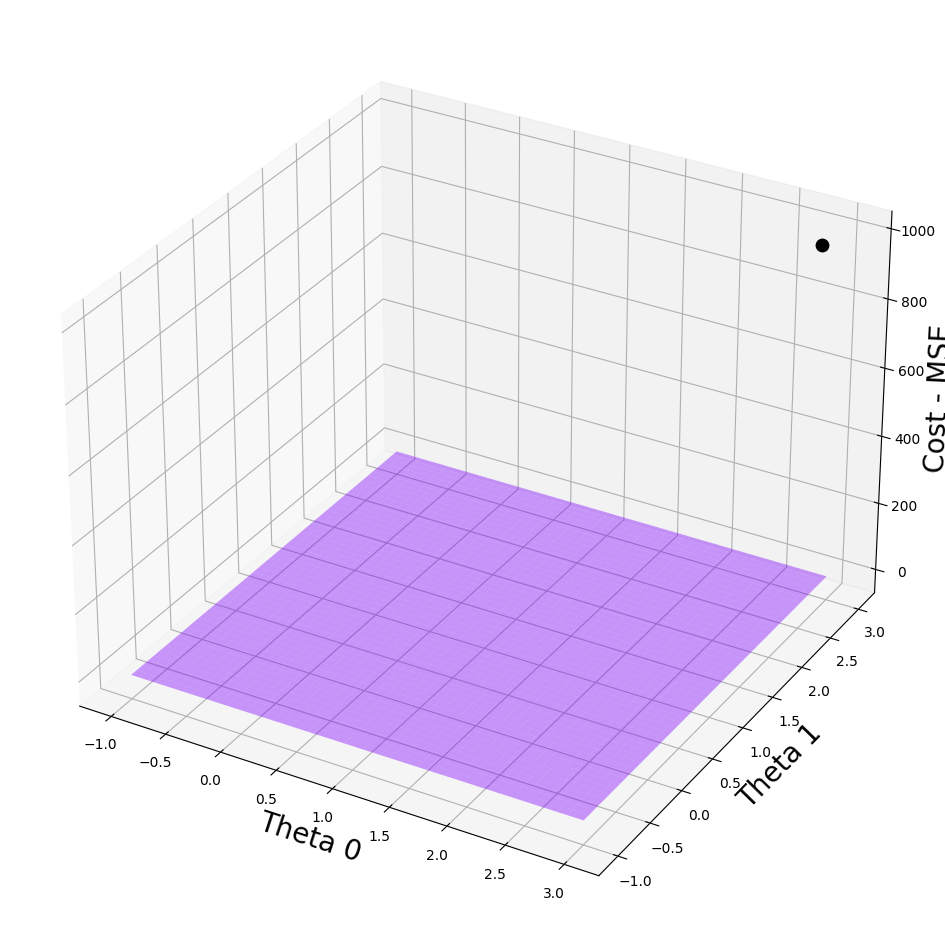

In [31]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()